# version 표시하는 방법

# 프로그램 시작할 때 버전표시하는 방법

In [4]:
!pip3 install watermark

  Using cached https://files.pythonhosted.org/packages/4b/dc/fb451c174b4f603231875c9ca7116d1b81cdd635172f0fbab248b1d94cd5/watermark-1.8.1-py3-none-any.whl


watermark는 jupyter 전용임

In [1]:
%load_ext watermark
# watermark를 사용할 수 있게됨

In [2]:
%watermark -a minu -d -p numpy,pandas,sklearn  # 패키지 띄어쓰기 하면 안됨!
# shift tap치면 사용법 나옴

UsageError: unrecognized arguments: # 패키지 띄어쓰기 하면 안됨!


# [버전표시 2번째 방법](https://nbviewer.jupyter.org/github/jrjohansson/version_information/blob/master/example.ipynb)

In [3]:
!pip3 install version-information

In [4]:
%load_ext version_information

In [5]:
%version_information numpy, pandas  
# 패키지 띄어쓰기 가능
# 더 보기 좋지만, 한글이 깨지는 약간의 단점

Software versions
Python 3.7.3 64bit [Clang 6.0 (clang-600.0.57)]
IPython 7.5.0
OS Darwin 18.6.0 x86_64 i386 64bit
numpy 1.16.3
pandas 0.24.2
Wed Jun 19 23:52:08 2019 KST

# feature selection데이터가 
pca 단점 : 데이터 고유 성질이 사라짐 
해결책으로 feature selection

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [8]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [9]:
print(boston_data.DESCR)
# 집값 예측하는 데이터
# 불확실한 데이터가 없다 : 다 객관적인 사실 : 예측 가능성이 높다.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
pd_data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [11]:
pd_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [12]:
pd_target = pd.DataFrame(boston_data.target, columns=['target'])

In [13]:
boston_df = pd.concat([pd_data, pd_target], axis=1)

In [14]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [15]:
boston_df.info()
# 데이터 수가 부족한지 확인하려면 learning curve를 통해서 확인할 수 있다.
# NAN 데이터가 없다.
# 전부 숫자 데이터다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [16]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


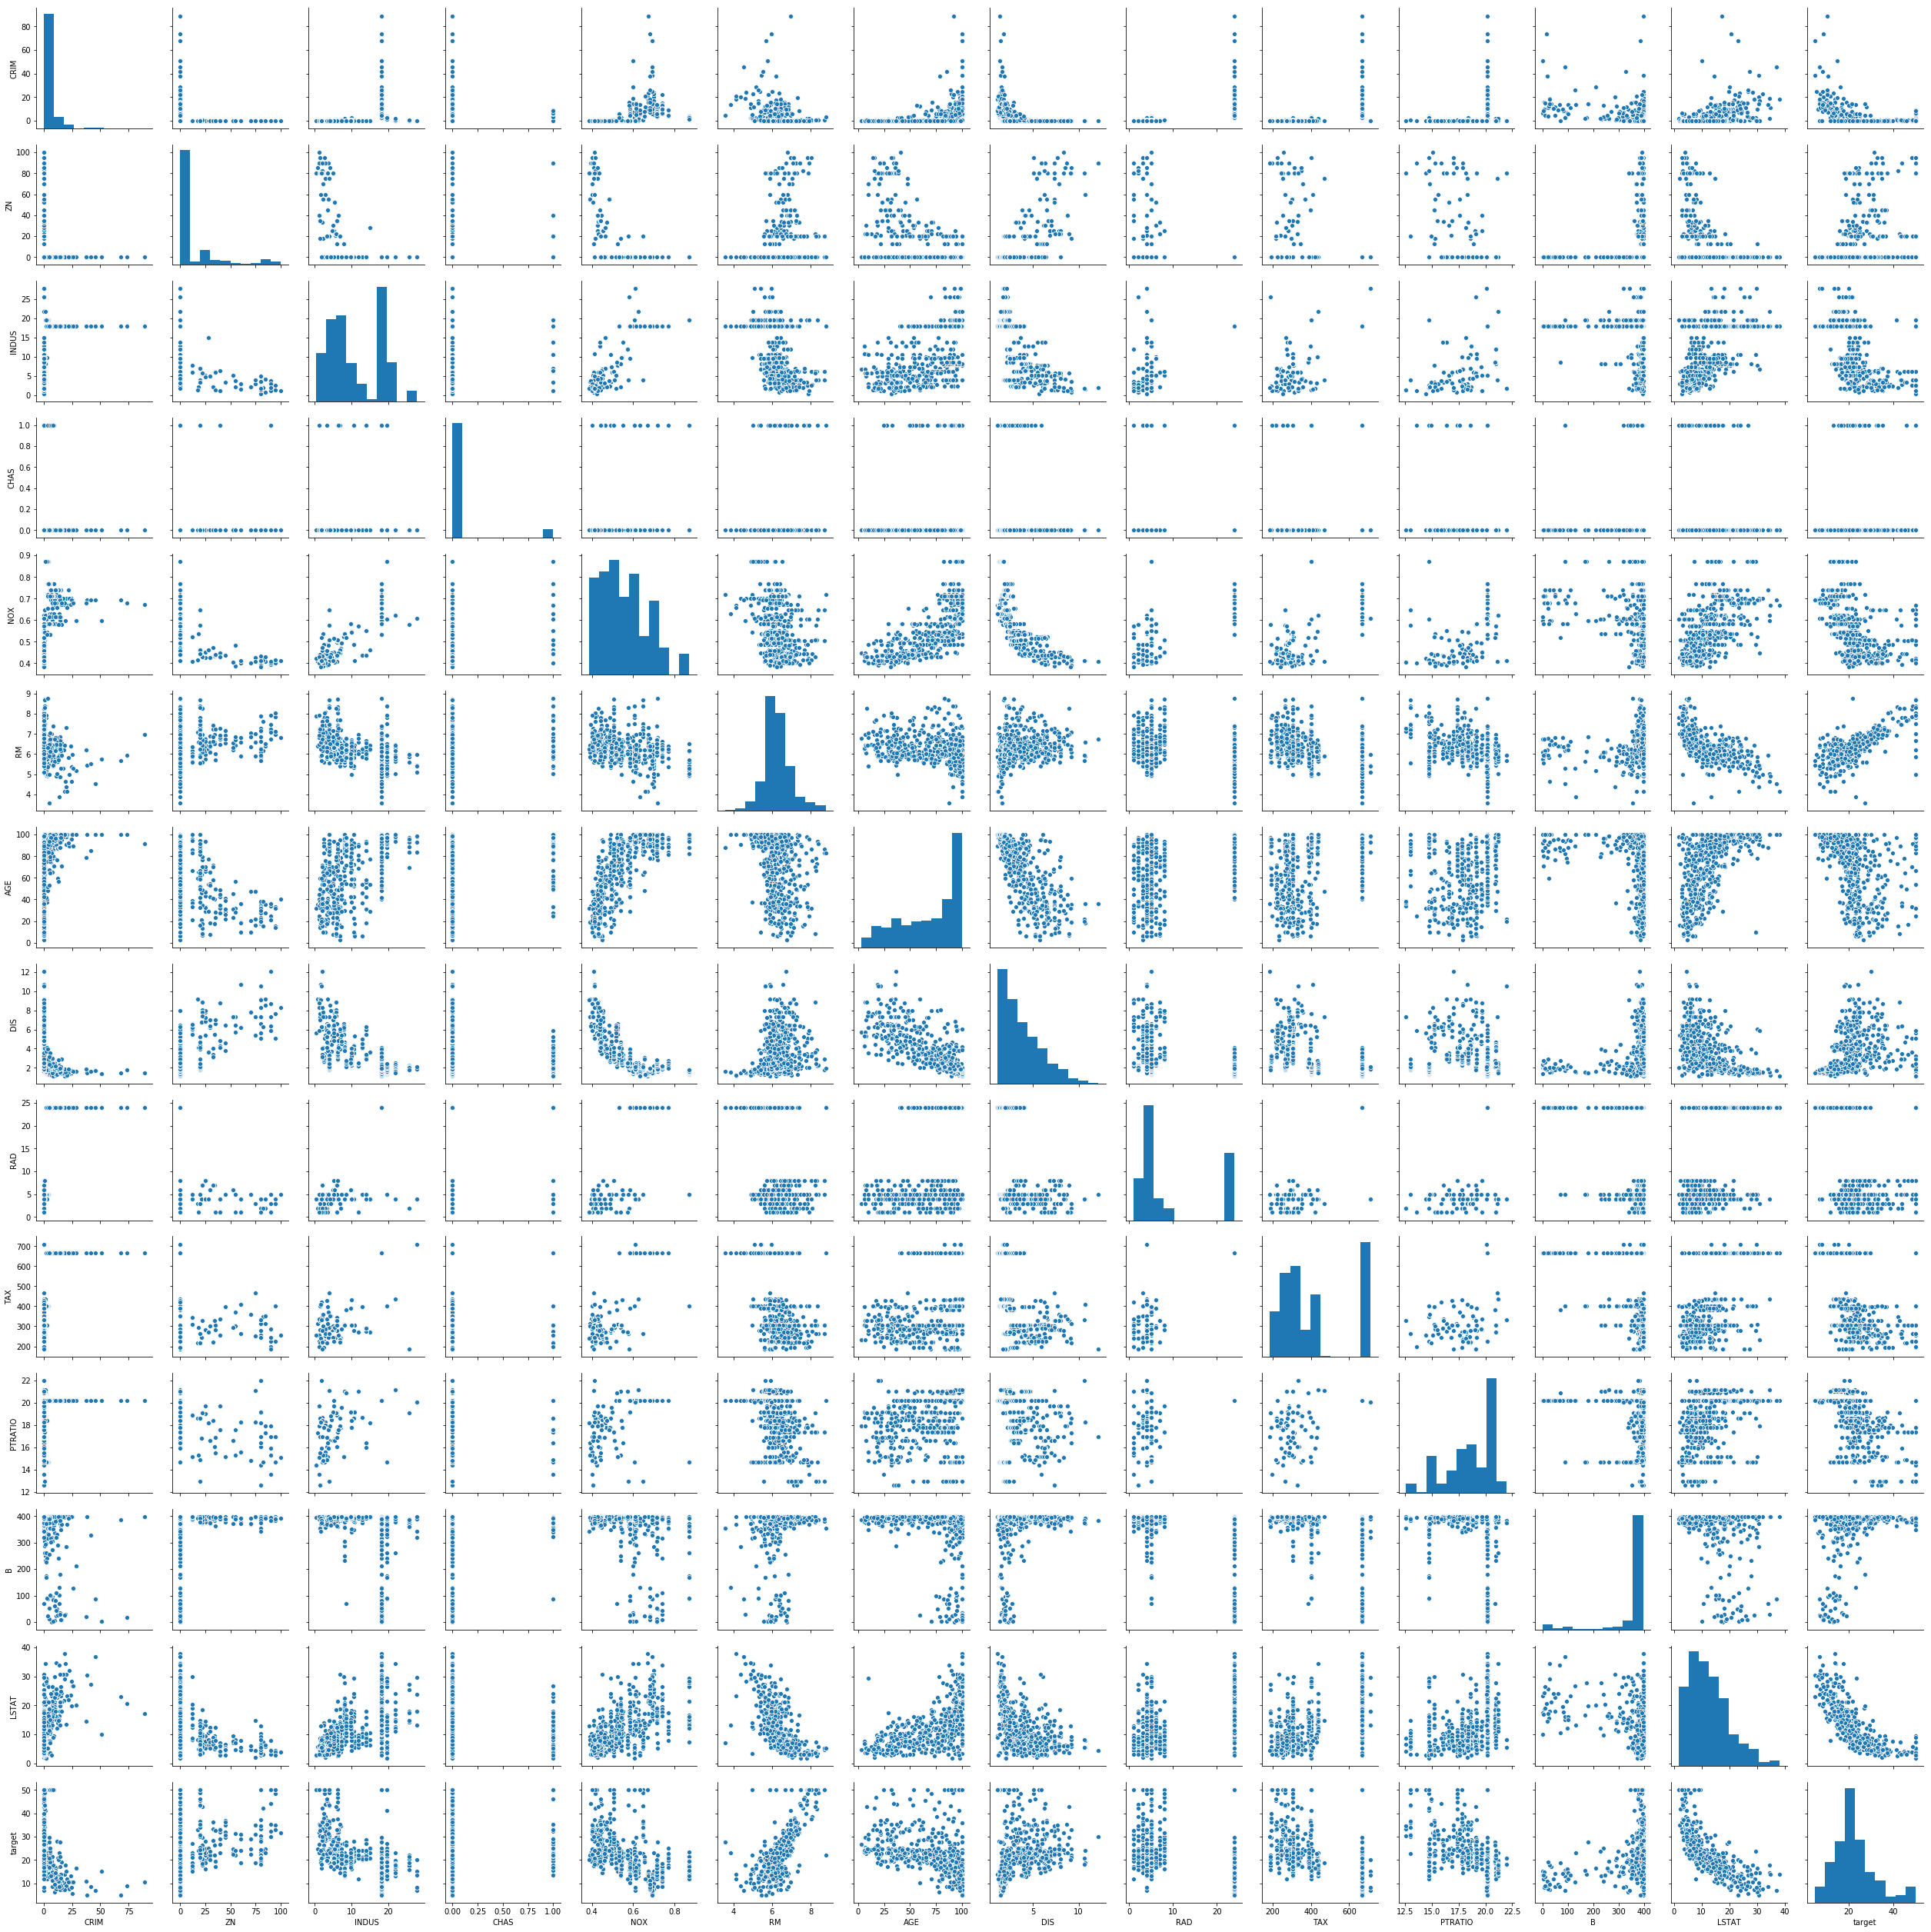

In [17]:
sns.pairplot(boston_df)
# regression은 색깔로 표현할 수 없다.
# 상관관계가 없어보이는게 많다. == column없애자...! == 이번 수업 목표

# stats model로 linear관계가 있는지 확인 가능

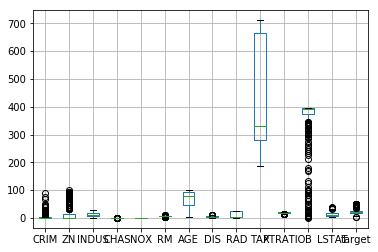

In [18]:
boston_df.boxplot()
# 세금(TAX), 흑인(B) 이 영향이 클텐데, scaler 안쓴다. scaler쓰면 영향을 못미치니까...

In [19]:
boston_df.corr()
# 범죄율하고 RAD가 연관이 높다..!

# heatmap그리기 전에 반드시 corr!

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


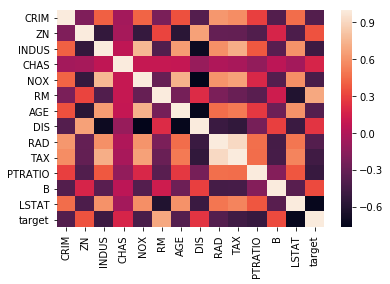

In [20]:
sns.heatmap(boston_df.corr())
# 진할수록 음의 관계
# 상식과 데이터가 다를 수도 있다.

# category, str가 없으니까 aggregation 분석이 불가능하다.

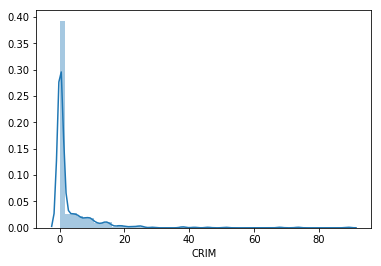

In [21]:
sns.distplot(boston_df.CRIM)
# aggregation분석 대신 각 데이터에 대해서 이러한 그래프 그리면 됨

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# 데이터 수가 적어서 cross_val_score사용함
cross_val_score(LinearRegression(), boston_df.iloc[:,:-1], boston_df.iloc[:,-1], cv=10, n_jobs=-1).mean()
# 데이터가 선형인지 아닌지 경향을 살펴보기 위해서 사용함 == 성능평가가 아님...!

0.20252899006055797

In [26]:
from sklearn.model_selection import learning_curve

In [27]:
learning_curve(LinearRegression(), boston_df.iloc[:,:-1], boston_df.iloc[:,-1], cv=10, n_jobs=-1)
# test score가 너무 나쁘다.

(array([ 45, 147, 250, 352, 455]),
 array([[0.90972118, 0.91397553, 0.91397553, 0.91397553, 0.91397553,
         0.91397553, 0.91397553, 0.91397553, 0.91397553, 0.91397553],
        [0.84897849, 0.86293297, 0.85141152, 0.8473625 , 0.8473625 ,
         0.8473625 , 0.8473625 , 0.8473625 , 0.8473625 , 0.8473625 ],
        [0.87591387, 0.88495254, 0.87106452, 0.89798195, 0.88220906,
         0.85574245, 0.85574245, 0.85574245, 0.85574245, 0.85574245],
        [0.72390396, 0.73872275, 0.73362688, 0.71135235, 0.73131946,
         0.69299327, 0.73608392, 0.8739447 , 0.8739447 , 0.8739447 ],
        [0.73881255, 0.74709133, 0.74383384, 0.71721296, 0.74172425,
         0.70431396, 0.74824338, 0.84039967, 0.7384314 , 0.74169755]]),
 array([[-2.39337134e+00, -5.45766322e+02, -5.22166885e+03,
         -2.02250301e+02, -7.07877617e+01, -1.74604151e+02,
         -9.67733136e+02, -3.48851076e+02, -3.19661678e+03,
         -3.85396874e+03],
        [ 7.69801831e-01,  6.34659895e-01, -4.70812003e-01,
 

In [28]:
train_sizes, train_scores, test_scores   = learning_curve(LinearRegression(), boston_df.iloc[:,:-1], \
                                                          boston_df.iloc[:,-1], cv=10, n_jobs=-1)

In [29]:
from sklearn_evaluation import plot

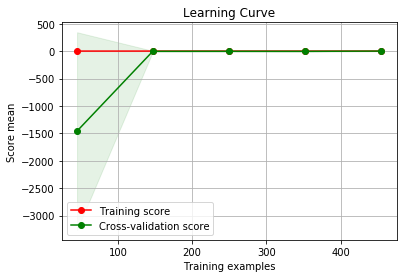

In [30]:
plot.learning_curve(train_scores, test_scores, train_sizes)
# 척도때문에 별로 차이 안나보인다.

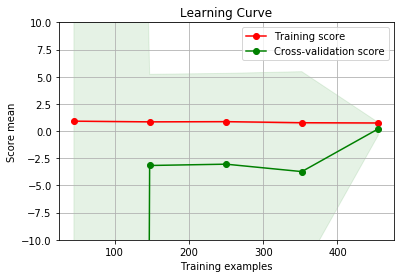

In [31]:
plt.ylim([-10., 10.])
plot.learning_curve(train_scores, test_scores, train_sizes)
# 데이터가 부족하다는 사실을 알 수 있다. == 데이터가 많으면 정확도가 더 올라가겠구나...!

# 오늘 - 핵심

# 상황 : 
# 적으면 데이터 수집해야함
# 못하면...? column을 줄이자 == PCA를 씀: 단점이 있음 : 데이터 원래 속성을 잃음
# 통계적으로 설명하기 위해서는 PCA쓰면 안됨 == 데이터 원래 속성을 잃음
# 설명할 수 있게하기 위해서 속성을 잃지 않도록 selection 사용함

# 상관관계가 크면 클수록 하나만으로 나타낼 수 있다.

# feature selection 도메인 지식으로 나와 관련된 거 뽑는 기법 : 영향력이 큰 feature만 뽑아서 사용
# 1. 필터방식 : 배경지식이 없다면, 사용 : 단일통계값을 이용해서 부정확함 == 통계값 기준으로 선택 == 실무에 많이 못 씀 == scaling할 때 문제생김
# scaling해버리면 통계값이 바뀌니까(결과가 달라짐) 쓰기 힘들다. & 정확도가 그렇게 안 높다.

# 2. wrapper 방식 : 알고리즘과 연관시켜서 찾는 방식, 꼭 estimator가 필요함. 영향력이 높은 feature를 찾아줌 
# == 몇 feature를 없애므로 항상 성능이 좋을 순 없다.

# 3. embedded방식 : 알고리즘(모델) 자체에서 feature의 중요성을 뽑음 : ex ) DecisionTreeClassifier

In [ ]:
# 집값 데이터 == 우리가 확보한 데이터 외에도 영향을 많이 받는다. == 성능이 높을 수 없다.
# 이걸로 집값 예측하는건 사기야..!

# Filtered

In [1]:
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
# sk = SelectKBest(chi2, 4)
# chi2 기준으로 각각의 통계값 구해서 4개 뽑아줌

In [3]:
sk.fit_transform(boston_df.iloc[:,:-1], boston_df[['target']])

NameError: name 'sk' is not defined

In [119]:
# 관계 높은거 뽑아서 따로 뽑은거로만 모델만듦
corr = boston_df.corr()
cor_target = abs(corr['target'])
relevant_features = cor_target[cor_target > 0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
target     1.000000
Name: target, dtype: float64

# wrapper방식

In [32]:
from sklearn.feature_selection import RFE

# 기계학습을 이용해서 최적의 선택을 고름

In [50]:
model = LinearRegression()
rf = RFE(model, 5)
# 가장 학습 잘 되는 5개 feature를 확인하면 됨

In [51]:
t = rf.fit_transform(boston_df.iloc[:,:-1], boston_df.iloc[:,-1])
model.fit(t, boston_df.iloc[:,-1])
# model.score(boston_df.iloc[:,:-1], boston_df.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
np.where(rf.ranking_==1)[0]

array([ 3,  4,  5,  7, 10])

In [53]:
vars(rf)
# 가장 좋은 조합이 ranking에 있음 : 1로 되어있는 것

{'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'n_features_to_select': 5,
 'step': 1,
 'verbose': 0,
 'estimator_': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'n_features_': 5,
 'support_': array([False, False, False,  True,  True,  True, False,  True, False,
        False,  True, False, False]),
 'ranking_': array([4, 6, 5, 1, 1, 1, 9, 1, 3, 7, 1, 8, 2])}

In [54]:
k = boston_df.iloc[:,np.where(rf.ranking_==1)[0]]

In [55]:
boston_df.iloc[:,np.where(rf.ranking_==1)[0]]
# 이 feature로 학습하면 제일 잘 될거야...! 하지만 잘된건지 확인해야함

,CHAS,NOX,RM,DIS,PTRATIO
0,0.0,0.538,6.575,4.0900,15.3
1,0.0,0.469,6.421,4.9671,17.8
2,0.0,0.469,7.185,4.9671,17.8
3,0.0,0.458,6.998,6.0622,18.7
4,0.0,0.458,7.147,6.0622,18.7
5,0.0,0.458,6.430,6.0622,18.7
6,0.0,0.524,6.012,5.5605,15.2
7,0.0,0.524,6.172,5.9505,15.2
8,0.0,0.524,5.631,6.0821,15.2
9,0.0,0.524,6.004,6.5921,15.2


# [cross-validation-score](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [56]:
cross_val_score(LinearRegression(), k, boston_df.iloc[:,:-1],cv=10).mean()
# 몇 feature를 없애므로 성능이 항상 좋을 순 없다.
# 공식을 찾아보자...! 공식에 넣어보니까 음수가 나온다.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_s

-2.040225312989049

# RFE의 hyper-parameter는  pipeline&opensearchGrid으로 최적의 값 찾아줌